FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [1]:
import pandas as pd

Carrega o dataframe de treino.

In [2]:
data = pd.read_csv('fashion-mnist_train.csv')

In [3]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

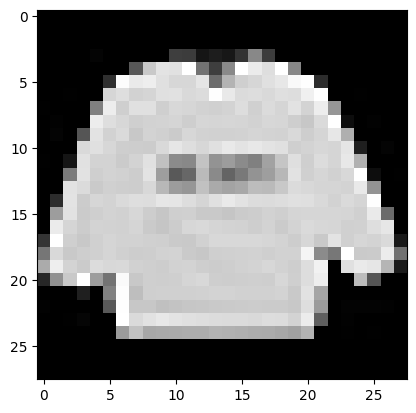

In [5]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

y recebe a coluna de labels e x o restante das colunas.

In [6]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

90% dos dados de treinamento vão realmente para treinamento e 10% para validação

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x,
y, test_size=0.10, random_state=42)

In [8]:
#x_train,x_val,y_train,y_val=train_test_split(x_train, y_train,
#test_size=0.1, random_state=84)

In [9]:
print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
#print("testing data points: {}".format(len(y_test)))

training data points: 54000
validation data points: 6000


In [10]:
kVals = range(1, 30, 1)
accuracies = []

Faz o treinamento com vários Ks para saber qual o melhor valor para esse parâmetro.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(x_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(x_val, y_val)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=85.52%
k=2, accuracy=84.77%
k=3, accuracy=85.80%
k=4, accuracy=86.02%
k=5, accuracy=85.55%
k=6, accuracy=85.88%
k=7, accuracy=85.40%
k=8, accuracy=85.78%
k=9, accuracy=85.58%
k=10, accuracy=85.50%
k=11, accuracy=85.40%
k=12, accuracy=85.23%
k=13, accuracy=85.13%
k=14, accuracy=85.03%
k=15, accuracy=84.62%
k=16, accuracy=84.77%
k=17, accuracy=84.58%
k=18, accuracy=84.75%
k=19, accuracy=84.60%
k=20, accuracy=84.62%
k=21, accuracy=84.60%
k=22, accuracy=84.45%
k=23, accuracy=84.27%
k=24, accuracy=84.43%
k=25, accuracy=84.25%
k=26, accuracy=84.38%
k=27, accuracy=84.07%
k=28, accuracy=84.17%
k=29, accuracy=84.02%


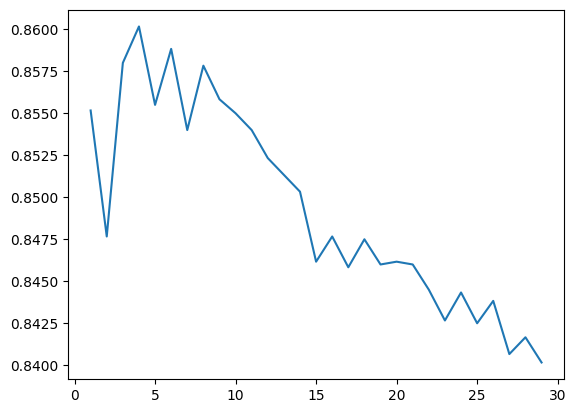

In [12]:
plt.plot(kVals, accuracies)

Faz o treinamento com k=4 usando distância 'uniform'.

In [13]:
model = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
model.fit(x_train, y_train)
# evaluate the model and update the accuracies list
score = model.score(x_val, y_val)
print("accuracy=%.2f%%" % (score * 100))

accuracy=86.02%


In [25]:
model.predict(x_val)

array([7, 8, 8, ..., 6, 0, 4])

In [15]:
x_val[0:1,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [16]:
y_val[0]

7

Carrega o dataframe de teste.

In [17]:
test = pd.read_csv('fashion-mnist_test.csv')

test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


y recebe a coluna de labels e x o restante das colunas.

In [18]:
x=test.iloc[:,1:].values
y=test.iloc[:,0].values

Faz o teste de predição com uma amostra aleatória do conjunto de teste e mostra a imagem da amostra.

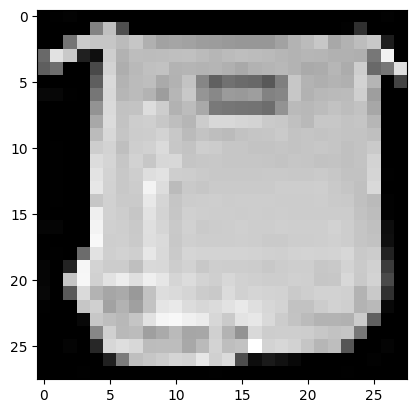

array([8])

In [27]:
plt.imshow(test.values[9998][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()
model.predict(x[9998:9999,:])

In [20]:
y[9998]

8

Mostra a acurária do modelo sobre o conjunto de teste.

In [29]:
v = model.predict(x)

In [31]:
sum = 0
for i in range(10000):
  if v[i]==y[i]:
    sum+=1
  

In [33]:
acc=(sum/10000)*100
acc

85.84

Faz o treinamento com vários Ks para saber qual o melhor valor para esse parâmetro, usando distância 'distance'.

In [36]:
accuracies = []
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, weights="distance" ,metric='euclidean')
        model.fit(x_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(x_val, y_val)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=85.52%
k=2, accuracy=85.52%
k=3, accuracy=86.02%
k=4, accuracy=86.05%
k=5, accuracy=85.72%
k=6, accuracy=86.08%
k=7, accuracy=85.72%
k=8, accuracy=85.92%
k=9, accuracy=85.72%
k=10, accuracy=85.80%
k=11, accuracy=85.57%
k=12, accuracy=85.48%
k=13, accuracy=85.35%
k=14, accuracy=85.20%
k=15, accuracy=84.77%
k=16, accuracy=84.95%
k=17, accuracy=84.80%
k=18, accuracy=84.93%
k=19, accuracy=84.77%
k=20, accuracy=84.70%
k=21, accuracy=84.77%
k=22, accuracy=84.57%
k=23, accuracy=84.52%
k=24, accuracy=84.52%
k=25, accuracy=84.40%
k=26, accuracy=84.42%
k=27, accuracy=84.25%
k=28, accuracy=84.23%
k=29, accuracy=84.23%


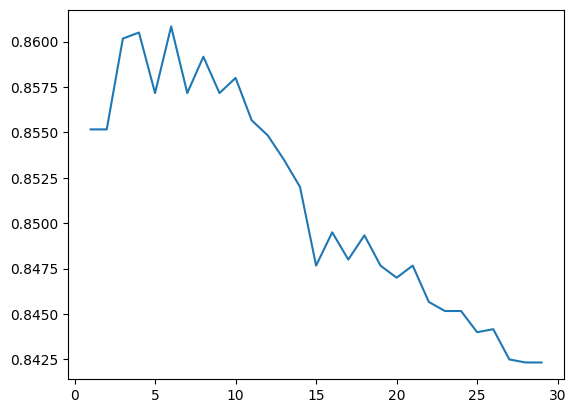

In [37]:
plt.plot(kVals, accuracies)